In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

The [Fashion MNIST dataset](https://github.com/zalandoresearch/fashion-mnist) is a collection of grayscale 28x28 pixel clothing images. Each image is associated with a label as shown in this table⁉

Label	Description
<br>0	T-shirt/top
<br>1	Trouser
<br>2	Pullover
<br>3	Dress
<br>4	Coat
<br>5	Sandal
<br>6	Shirt
<br>7	Sneaker
<br>8	Bag
<br>9	Ankle boot

This dataset is available directly in the [tf.keras.datasets](https://github.com/zalandoresearch/fashion-mnist) API and you load it like this:

In [2]:
fmnist = tf.keras.datasets.fashion_mnist #load fashion mnist data

In [4]:
#loading train test split of fashion mnist data
(training_images,training_labels), (test_images,test_labels) = fmnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


LABEL: 9

IMAGE PIXEL ARRAY 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1 

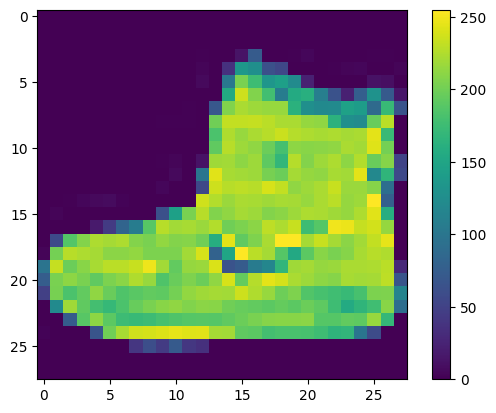

In [7]:
index = 0

np.set_printoptions(linewidth=200)

print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY \n\n{training_images[index]}\n\n')

plt.imshow(training_images[index])
plt.colorbar()
plt.show()

LABEL: 9

IMAGE PIXEL ARRAY 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  82 187  26   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0   0 179 240 237 255 240 139  83  64  43  60  54   0   1]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0  58 239 222 234 238 246 252 254 255 248 255 187   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2   3 

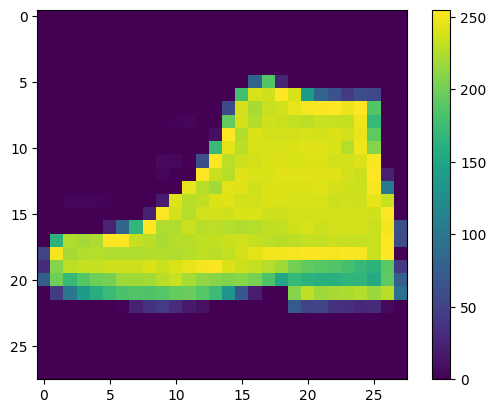

In [8]:
index = 42

np.set_printoptions(linewidth=200)

print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY \n\n{training_images[index]}\n\n')

plt.imshow(training_images[index])
plt.colorbar()
plt.show()

In [9]:
#normalizing by dividing by 255

training_images = training_images / 255
test_images = test_images / 255

In [22]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28)), #thus in i/p shape of our data
    tf.keras.layers.Flatten(), #this is the 1st layer which flattens i/p, 28*28 = 784 = i/p layer size
    tf.keras.layers.Dense(128,activation="relu"), #this is our hidden layer
    tf.keras.layers.Dense(10,activation="softmax") #o/p layer
]) # i/p layer 28*28 = 784 ==> hidden layer 128 ==> o/p layer 10

In [23]:
model.compile(optimizer = tf.optimizers.Adam(),#Adam is a popular optimization algorithm that adjusts learning rates automatically
              loss = 'sparse_categorical_crossentropy',#This is the loss function used in multi-class classification & labels are integers (0 to 9) & not one-hot encoded vectors.
              metrics = ['accuracy'] #Tells the model to track and report accuracy (percentage of correct predictions) during training and evaluation.
              )

model.fit(training_images,training_labels,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7838 - loss: 0.6263
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8642 - loss: 0.3775
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8739 - loss: 0.3447
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8833 - loss: 0.3151
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8909 - loss: 0.2940


In [ ]:
#here after 5 epohch we get 0.2934 loss which is good considering just 5 epoch

🟢 What is an Epoch?

One epoch = One full pass through the entire training dataset.

If you have 10,000 training samples, then:

In 1 epoch, the model will see all 10,000 once.

In 5 epochs, the model will see the full dataset 5 times — learning a bit more each time.

❓ What Happens During One Epoch?

⏭️ Forward Pass:

The model takes the inputs (images, features, etc.)

It feeds them forward through the layers

It computes predictions

Then calculates loss (how wrong the predictions were)

⏮️ Backward Pass (Backpropagation):

The model computes gradients of the loss with respect to each weight

It uses backpropagation to move the error backward through the network

Gradients tell each weight how much to change to reduce the loss

The optimizer (e.g., Adam) uses these gradients to update the weights

⏭️⏮️This process (forward + backward) is done for:

A batch of samples (e.g., 32, 64 at a time)

Then repeated for all batches in the dataset = 1 epoch

🔄 Repeating Over Epochs
The reason you train for multiple epochs is because the model won't learn everything in one go.

With each epoch:

The weights get a little better

The loss usually decreases

The accuracy usually improves

After 5 epochs, the model has had 5 chances to adjust weights across the whole dataset.

In [24]:
#evaluating on test data
model.evaluate(test_images,test_labels)#accuracy = 86.47%, loss = 0.3851

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8688 - loss: 0.3743


[0.3851197361946106, 0.8647000193595886]

### Exploration Exercises
To explore further and deepen your understanding, try the below exercises:

**Exercise 1:**

For this first exercise run the below code: It creates a set of classifications for each of the test images, and then prints the first entry in the classifications. The output, after you run it is a list of numbers. Why do you think this is, and what do those numbers represent?

In [26]:
classifications = model.predict(test_images)

print(classifications[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[2.3007424e-06 2.3421210e-08 4.1067378e-06 8.9008061e-08 4.4768576e-06 4.1176181e-02 2.5741992e-06 9.9832632e-02 1.7505672e-05 8.5896015e-01]


In [27]:
print(test_labels[0])

9


**Exercise 2:**

Let's now look at the layers in your model. Experiment with different values for the dense layer with 512 neurons. What different results do you get for loss, training time etc? Why do you think that's the case?

In [29]:
model = tf.keras.models.Sequential([tf.keras.Input(shape=(28,28)),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024,activation = "relu"),
                                    tf.keras.layers.Dense(10,activation = "softmax")
                                    ]) # i/p layer 28*28 = 784 ==> hidden layer 1024 ==> o/p layer 10

In [30]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)#loss has decreased to 0.3536

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - loss: 0.5824
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - loss: 0.3703
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - loss: 0.3220
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 13ms/step - loss: 0.2960
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - loss: 0.2806
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3536
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
[9.3193688e-07 1.7637017e-08 1.6946001e-07 3.7751593e-09 1.6866958e-08 1.2570589e-02 1.2049180e-06 1.0642006e-01 1.9729009e-06 8.8100499e-01]
9


**Exercise 3:**

E3Q1: What would happen if you remove the Flatten() layer. Why do you think that's the case?
Click for Answer

Answer:

You get an error about the shape of the data. It may seem vague right now, but it reinforces the rule of thumb that the first layer in your network should be the same shape as your data. Right now our data is 28x28 images, and 28 layers of 28 neurons would be infeasible, so it makes more sense to 'flatten' that 28,28 into a 784x1. Instead of writng all the code to handle that ourselves, we add the Flatten() layer at the begining, and when the arrays are loaded into the model later, they'll automatically be flattened for us.

**Exercise 4:**

Consider the final (output) layers. Why are there 10 of them? What would happen if you had a different amount than 10? For example, try training the network with 5.

Click for Answer

Answer

You get an error as soon as it finds an unexpected value. Another rule of thumb -- the number of neurons in the last layer should match the number of classes you are classifying for. In this case it's the digits 0-9, so there are 10 of them, hence you should have 10 neurons in your final layer.

**Exercise 5:**

Consider the effects of additional layers in the network. What will happen if you add another layer between the one with 512 and the final layer with 10.

Click for Answer

Answer

There isn't a significant impact -- because this is relatively simple data. For far more complex data (including color images to be classified as flowers that you'll see in the next lesson), extra layers are often necessary.

In [32]:
model = tf.keras.models.Sequential([tf.keras.Input(shape=(28,28)),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512,activation = "relu"),
                                    tf.keras.layers.Dense(128,activation = "relu"), #additional layer
                                    tf.keras.layers.Dense(10,activation = "softmax")
                                    ]) # i/p layer 28*28 = 784 ==> hidden layer_1 512 ==> hidden layer_2 128 ==> o/p layer 10

In [34]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy'
              )

model.fit(training_images,training_labels,epochs=5)
model.evaluate(test_images,test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - loss: 0.5804
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - loss: 0.3599
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 10ms/step - loss: 0.3266
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - loss: 0.3013
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - loss: 0.2764
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3591
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[3.9791908e-07 1.2691875e-06 1.7932223e-06 4.4931656e-07 9.0478153e-08 6.2696789e-03 5.0409521e-06 4.6857145e-02 2.3625680e-06 9.4686174e-01]
9


**Exercise 6:**

E6Q1: Consider the impact of training for more or less epochs. Why do you think that would be the case?

Try 15 epochs -- you'll probably get a model with a much better loss than the one with 5

Try 30 epochs -- you might see the loss value stops decreasing, and sometimes increases.
This is a side effect of something called 'overfitting' which you can learn about later and it's something you need to keep an eye out for when training neural networks. There's no point in wasting your time training if you aren't improving your loss, right! :)

Exercise 7:

Before you trained, you normalized the data, going from values that were 0-255 to values that were 0-1. What would be the impact of removing that? Here's the complete code to give it a try. Why do you think you get different results?

**Exercise 8:**

Earlier when you trained for extra epochs you had an issue where your loss might change. It might have taken a bit of time for you to wait for the training to do that, and you might have thought 'wouldn't it be nice if I could stop the training when I reach a desired value?' -- i.e. 95% accuracy might be enough for you, and if you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs....So how would you fix that? Like any other program...you have callbacks! Let's see them in action...